In [1]:
import os
import audiolabel
import ultratils.pysonix.bprreader

import pandas as pd
import numpy as np
import parselmouth
import random

import scipy.signal as sg
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import audosync

In [2]:
datadir = os.path.abspath('./data/')

The goal of this notebook is to extend the proof of concept to more test cases.  Let's begin with more productions from the same speaker.

In [3]:
testsubj = '121'
acquisitions = [f for f in os.listdir(os.path.join(datadir,testsubj)) 
                if os.path.isdir(os.path.join(datadir,testsubj,f))]
testoffsets = [i/100 for i in range(-20,21)]

Now we want to make sure that the true sync works better than when the audio is offset.  This loop creates a new audiofile with an offset as indicated, then attempts to run the matchstreak function.  If successful, it will produce the offset, and the output of matchstreak, which is a tuple containing (max streaklength in frames, onsets of all streaks, offsets of all streaks).

In [4]:
testsyncdf = pd.DataFrame(columns=['subject','acquisition','word','offset','streak','syncduration'])

# for i in range(0,5):
for i in range(0,len(acquisitions)):
#     testcase = random.choice(acquisitions) # choose a random acquisition
    testcase = acquisitions[i]
    if i%10==0:
        print(str(i)+'/'+str(len(acquisitions)))

    # read the word
    stimfile = os.path.join(datadir, testsubj, testcase, 'stim.txt')
    with open(stimfile,'r') as f:
        word = f.read()
    if word == 'bolus':
        continue
        
    # read in the BPR
    bprloc = os.path.join(datadir, testsubj, testcase, testcase+'.bpr')
    bpr = ultratils.pysonix.bprreader.BprReader(bprloc)
    # read in the audio
    auloc = os.path.join(datadir, testsubj, testcase, testcase+'.bpr.wav')
    au = parselmouth.Sound(auloc).extract_channel(1)
    # read in the known synchronization data, and create a dataframe to add to
    syncloc = os.path.join(datadir, testsubj, testcase, testcase+'.bpr.sync.txt')

    try:
        frame_times = audosync.get_datadf_simple(bpr, au, syncloc)
        for offset in testoffsets:
            try:    
                m = audosync.matchstreak(audosync.syncmatch(frame_times, offset=offset))
                ds = []
                for j in range(0,len(m[1])):
                    ds = ds+[m[2][j]-m[1][j]]
                testsyncdf = testsyncdf.append(pd.DataFrame({'subject':[testsubj],'acquisition':[testcase],
                                                             'word':[word],'offset':[offset], 'streak':[m[0]],
                                                             'syncduration':[sum(ds)]}))
            except:
                testsyncdf = testsyncdf.append(pd.DataFrame({'subject':[testsubj],'acquisition':[testcase],
                                                             'word':[word],'offset':[offset], 'streak':[0],
                                                             'syncduration':[0]}))
    except:
        print("Exception: "+testcase)

print('Done!')

0/394


/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:117: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


10/394
20/394
30/394
40/394
50/394
60/394
70/394
80/394
90/394
100/394
Exception: 2015-10-30T105705-0700
110/394
Exception: 2015-10-30T105142-0700
120/394
Exception: 2015-10-30T104231-0700
130/394
140/394
Exception: 2015-10-30T105636-0700
150/394
160/394
170/394
180/394
190/394
200/394
210/394
220/394
230/394
240/394
250/394
260/394
270/394
280/394
Exception: 2015-10-30T105058-0700
290/394
300/394
310/394
Exception: 2015-10-30T104612-0700
320/394
330/394
340/394
350/394
360/394
370/394
Exception: 2015-10-30T104234-0700
380/394
390/394
Exception: 2015-10-30T104218-0700
Done!


In [5]:
testsyncdf.head()

,subject,acquisition,word,offset,streak,syncduration
0,121,2015-10-30T104325-0700,sob,-0.20,0,0
0,121,2015-10-30T104325-0700,sob,-0.19,3,0.0265
0,121,2015-10-30T104325-0700,sob,-0.18,4,0.053
0,121,2015-10-30T104325-0700,sob,-0.17,5,0.0618
0,121,2015-10-30T104325-0700,sob,-0.16,3,0.0441


In [6]:
testsyncdf['streak'] = pd.to_numeric(testsyncdf['streak'],errors='coerce')
testsyncdf['syncduration'] = pd.to_numeric(testsyncdf['syncduration'],errors='coerce')

In [7]:
maxsyncdf = pd.DataFrame()
for a in testsyncdf.acquisition.unique():
    sub = testsyncdf[testsyncdf['acquisition']==a].reset_index()
    t = sub.loc[sub['syncduration'].idxmax()]
    maxsyncdf = maxsyncdf.append(t)

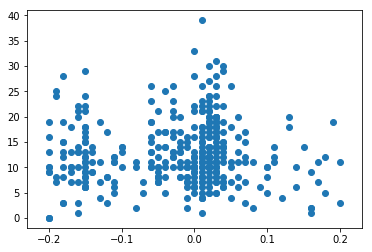

In [8]:
plt.scatter(x=maxsyncdf.offset,y=maxsyncdf.streak)

(array([10.,  4., 10.,  6., 10., 25.,  5.,  4.,  4.,  7.,  4.,  0.,  3.,
         2., 11., 14., 10., 11., 10., 14., 26., 38., 44., 49., 18.,  6.,
         6.,  6.,  2.,  1.,  4.,  3.,  1.,  2.,  2.,  1.,  4.,  2.,  2.,
         3.]),
 array([-0.2 , -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12,
        -0.11, -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03,
        -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,
         0.07,  0.08,  0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,
         0.16,  0.17,  0.18,  0.19,  0.2 ]),
 <a list of 40 Patch objects>)

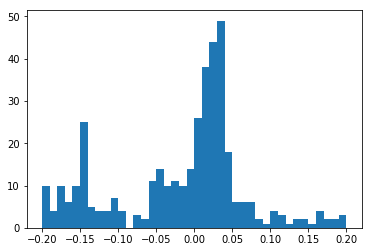

In [9]:
plt.hist(maxsyncdf.offset, bins=testoffsets)

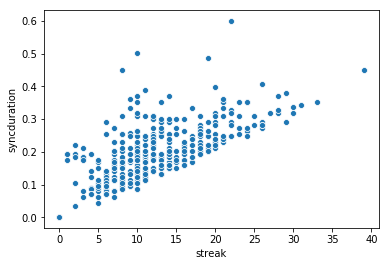

In [13]:
sns.scatterplot(x='streak',y='syncduration',data=maxsyncdf)

In [10]:
means = maxsyncdf.groupby(['word'])['offset','syncduration'].mean()

In [12]:
means.abs().sort_values('offset')

,offset,syncduration
word,,
bed,8.673617e-19,0.140087
sea,2.500000e-03,0.209588
bent,2.857143e-03,0.160143
shah,5.000000e-03,0.238287
bead,7.142857e-03,0.177757
boss,8.750000e-03,0.270262
paint,1.000000e-02,0.201875
Dee,1.500000e-02,0.335350
lob,1.500000e-02,0.143450
